# Trees

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
if not os.path.exists("images"): 
    os.mkdir("images")
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

In [245]:
import pandas as pd
from models import load_ames_nei, load_ames, data_encoding, splitter, linear, encod_linear, split_linear
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import sklearn.ensemble
from sklearn import tree
from sklearn import ensemble
from sklearn.inspection import PartialDependenceDisplay

<p><a name="top"></a></p>

Background Info:
 - [Column Definitions](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
 - [Column Variables](https://www.kaggle.com/datasets/ahmedmohameddawoud/ames-housing-data)

Tasks:
 - <a href="#tree">Decision Tree</a><br>
 - <a href="#for">Random Forest</a><br>
 - <a href="#boost">Boosting</a><br>
 - <a href="#sp_corr">Feature / Salesprice Correlations</a><br>

In [246]:
#Load data

housing_d = load_ames_nei()
housing_X = housing_d.drop(columns = ['SalePrice', 'MapRefNo','Prop_Addr','lat','long'])
housing_y = housing_d[['SalePrice']]
housing_X = housing_X.drop(columns = 'date')

In [248]:
# List of num and categorical features. Can changes as needed. 

categorical = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
              'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
              'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
              'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
              'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'PoolQC','Fence','MiscFeature','SaleType','SaleCondition',
               'Nei_quant','remodeled','MoSold',]
    
continuous = ['SalePrice','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','rate','OverallQual','YrSold','OverallCond',]

<p><a name="tree"></a></p>

### Decision Tree <a href="#top">[top]</a><br>

#### Saturated Model <a href="#top">[top]</a><br>

In [249]:
#Label encode categorical features

from sklearn.preprocessing import LabelEncoder
housing_l = housing_X.copy()
for i in categorical:
    label_encoder_i = LabelEncoder()
    housing_l[i] = label_encoder_i.fit_transform(housing_l[i])
housing_l.head(2)

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,rate,remodeled,Nei_quant
0,856,1,4,0,7890,1,3,3,0,0,0,19,2,2,0,2,6,6,1939,1950,1,0,13,14,2,0,3,4,1,5,5,4,5,238,6,0,618,856,1,4,1,3,856,0,0,1,0,1,0,2,1,4,4,6,1,5,1939,3,2,399,5,5,2,0,0,0,0,166,0,3,4,1,0,2,2010,9,4,4.99,1,0
1,1049,11,4,42,4235,1,3,3,0,4,0,7,2,2,4,2,5,5,1984,1984,1,0,6,6,1,149,2,4,1,2,5,2,2,552,0,393,104,1049,1,4,1,3,1049,0,0,1,0,2,0,2,1,2,5,6,0,1,1984,0,1,266,5,5,2,0,105,0,0,0,0,3,4,1,0,1,2009,9,4,5.07,0,0


<Figure size 640x480 with 0 Axes>

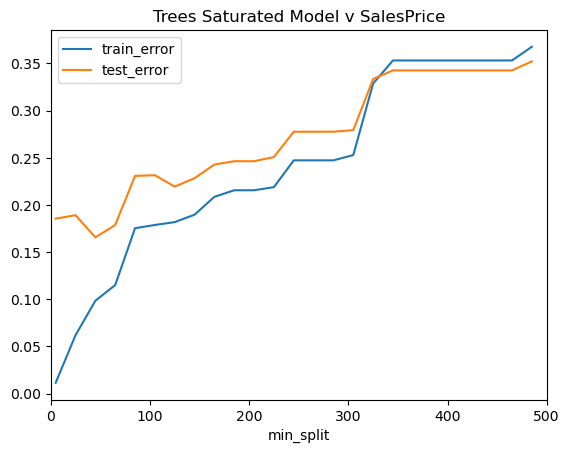

In [363]:
#Decision Tree for Saturated Model error is .33, acurracy is 1-.33 = 67% Establish X_train (sat)

#Prep Data
X = housing_l
y = housing_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

#Saturated Tree Model with min_sample_split tuning
save_name = 'Sat_tree'
title = 'Trees Saturated Model v SalesPrice'
errors = []
for i in range(5,500,20):
    tree_model = tree.DecisionTreeRegressor(min_samples_split=i)
    tree_model.fit(X_train, y_train)
    train_error = (1 - tree_model.score(X_train, y_train))
    test_error = (1 - tree_model.score(X_test, y_test))
    errors.append([i,train_error,test_error])
tree_scores = pd.DataFrame(errors, columns = ['min_split','train_error','test_error'])

plt.figure()
tree_scores.plot.line(x = 'min_split', y = ['train_error','test_error',], xlim = (0,500), title = title)
plt.savefig('images/{}.png'.format(save_name))

In [67]:
#Error
tree_scores.style.apply(
    lambda x: ['background-color: yellow' if x.name == 16 else '' for i in x], axis=1) #best fit is 125

,min_split,train_error,test_error
0,5,0.011515,0.178406
1,25,0.061933,0.186549
2,45,0.098422,0.165600
3,65,0.115096,0.178697
4,85,0.175323,0.230756
5,105,0.178737,0.231448
6,125,0.181788,0.219397
7,145,0.189619,0.228306
8,165,0.208611,0.242810
9,185,0.215519,0.246297


In [364]:
#Saturated Model, extracting Features and R2 = 66.6%
tree_model = tree.DecisionTreeRegressor(min_samples_split=325)
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)
print('train ', str(tree_model.score(X_test, y_test)))
print('test' , str(tree_model.score(X_test, y_test)))
sat_tree_features = pd.DataFrame(tree_model.feature_importances_, index = X_train.columns)
sat_tree_features[sat_tree_features[0]>0].sort_values(by=0, ascending = False)

train  0.6665424923818686
test 0.6665424923818686


,0
OverallQual,0.727932
GrLivArea,0.186545
1stFlrSF,0.038409
GarageCars,0.021588
TotalBsmtSF,0.016496
KitchenAbvGr,0.009030


Out of 80 features in the saturated model, only six were used. 

#### Tree with MLR Features <a href="#top">[top]</a><br>

train_error 0.32264094130793286
test_error 0.32236849171812665


,0
OverallQual,0.729855
GrLivArea,0.184900
1stFlrSF,0.038071
GarageCars,0.021397
TotalBsmtSF,0.016350
YearBuilt,0.009427


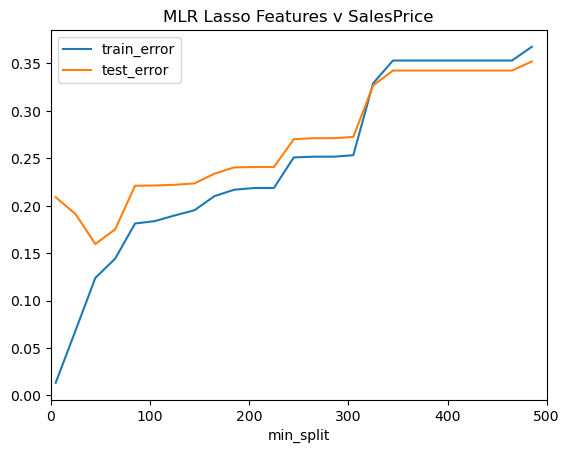

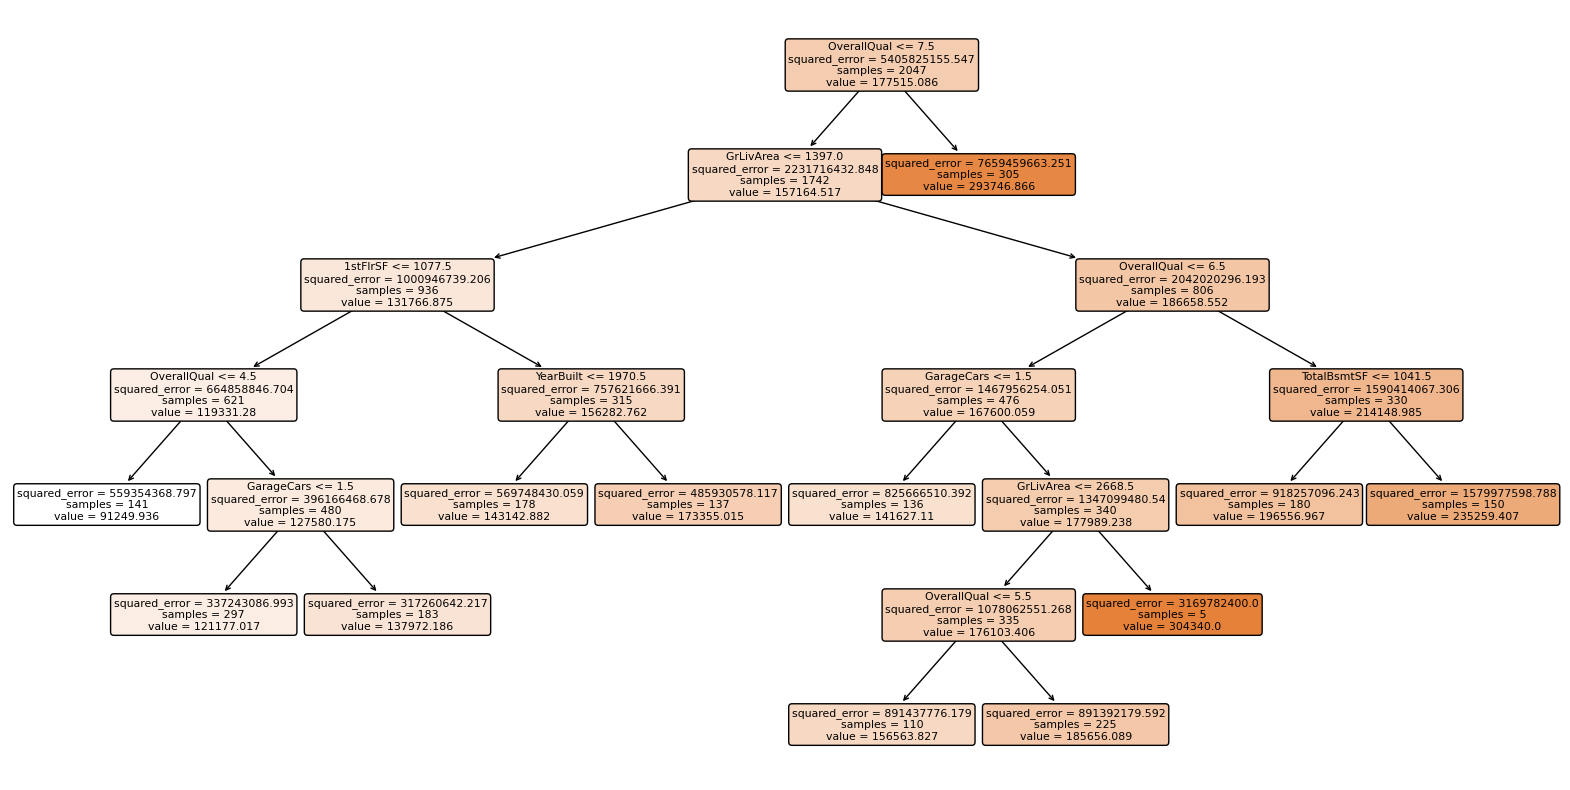

In [368]:
#Model using MLR 67.1%, establish X1_train (MLR Features)

#Generate Dataset
errors1 = []
MLR_15 = ['OverallCond', 'OverallQual', 'GarageCars', 'Fireplaces', 'FullBath', 'BsmtFullBath', 'HalfBath', 'YearBuilt', 'YearRemodAdd',
 'LotFrontage', 'GrLivArea', 'ScreenPorch', '1stFlrSF', '3SsnPorch', 'TotalBsmtSF']
X1 = housing_l[MLR_15]
y1 = housing_y

# Split the data into training and testing sets 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X1_train.shape

#Loop through min_samples_splits
for i in range(5,500,20):
    tree_model = tree.DecisionTreeRegressor(min_samples_split=i)
    tree_model.fit(X1_train, y1_train)
    train_error = (1 - tree_model.score(X1_train, y1_train))
    test_error = (1 - tree_model.score(X1_test, y1_test))
    errors1.append([i,train_error,test_error])
tree_scores1 = pd.DataFrame(errors1, columns = ['min_split','train_error','test_error'])

#plot min_samples_splits against train adn test r2
tree_scores1.plot.line(x = 'min_split', y = ['train_error','test_error',], xlim = (0,500), title = 'MLR Lasso Features v SalesPrice')
plt.savefig('images/trees_mlr.png')

#Print dataset, identify best min_samples_spit
tree_model = tree.DecisionTreeRegressor(min_samples_split=310)
tree_model.fit(X1_train, y1_train)
train_error = 1 - tree_model.score(X1_train, y1_train)

#Plot Tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, filled=True, feature_names=X1_train.columns, rounded=True)
plt.savefig('images/tree_mlr.png')

#print errors
print('train_error ' + str(train_error))
test_error = 1 - tree_model.score(X1_test, y1_test)
print('test_error ' + str(test_error))

#return features
sat_tree_features = pd.DataFrame(tree_model.feature_importances_, index = X1_train.columns)
sat_tree_features[sat_tree_features[0]>0].sort_values(by=0, ascending = False)

#### Tree with Lasso Features <a href="#top">[top]</a><br>

train_error 0.33939878420003433
test_error 0.3310160651927031


,0
OverallQual,0.771503
GrLivArea,0.200560
YearBuilt,0.027936


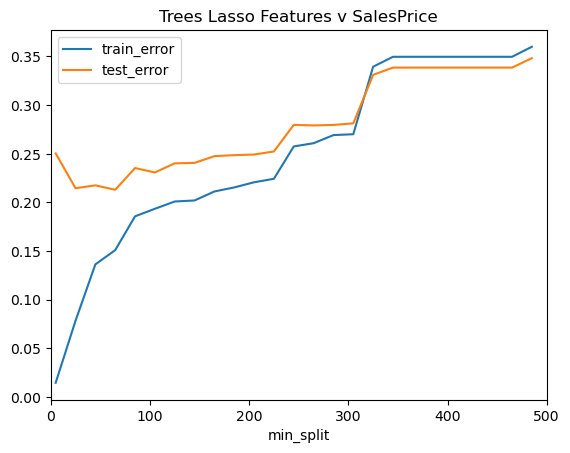

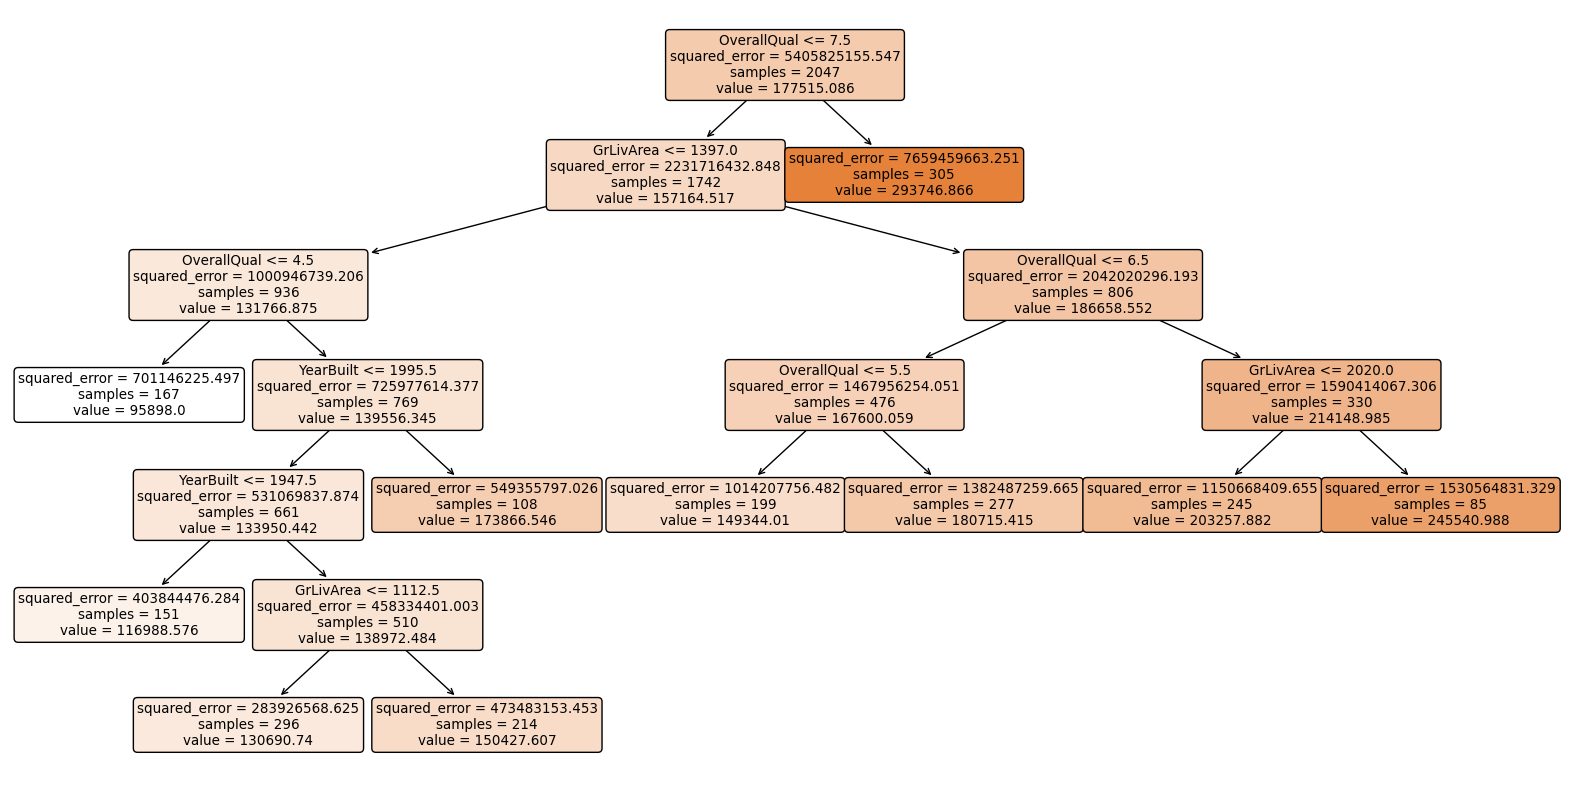

In [365]:
#Model using Lasso Features 66.8% r2, establish X2_train (Lasso Features)

#Create and split data set
errors1 = []
X1 = housing_l[['GrLivArea','OverallQual','YearBuilt','OverallCond','YearRemodAdd','BsmtFinSF2','BsmtUnfSF','Fireplaces','GarageYrBlt']]
y1 = housing_y
# Split the data into training and testing sets 
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X2_train.shape

#Loop through min_samples_splot 
for i in range(5,500,20):
    tree_model = tree.DecisionTreeRegressor(min_samples_split=i)
    tree_model.fit(X2_train, y2_train)
    train_error = (1 - tree_model.score(X2_train, y2_train))
    test_error = (1 - tree_model.score(X2_test, y2_test))
    errors1.append([i,train_error,test_error])
tree_scores1 = pd.DataFrame(errors1, columns = ['min_split','train_error','test_error'])

#Plot and save min_samples_splot against train and test error
tree_scores1.plot.line(x = 'min_split', y = ['train_error','test_error',], xlim = (0,500), title = 'Trees Lasso Features v SalesPrice')
plt.savefig('images/trees_lass.png')

#Print df, identify optimal min_sample_split
tree_model = tree.DecisionTreeRegressor(min_samples_split=325)
tree_model.fit(X2_train, y2_train)
train_error = 1 - tree_model.score(X2_train, y2_train)
print('train_error ' + str(train_error))
test_error = 1 - tree_model.score(X2_test, y2_test)
print('test_error ' + str(test_error))

# Plot Lasso Features Tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, filled=True, feature_names=X2_train.columns, rounded=True)
plt.savefig('images/tree_lasso.png')

#Print Features
sat_tree_features = pd.DataFrame(tree_model.feature_importances_, index = X2_train.columns)
sat_tree_features[sat_tree_features[0]>0].sort_values(by=0, ascending = False)

Lasso Features in model, end up with test r2 of .66. On only 3 features. 

In [71]:
tree_scores1.style.apply(
    lambda x: ['background-color: yellow' if x.name == 16 else '' for i in x], axis=1) #min split = 145

,min_split,train_error,test_error
0,5,0.013327,0.207573
1,25,0.068402,0.191226
2,45,0.123918,0.159599
3,65,0.144282,0.175181
4,85,0.181246,0.221063
5,105,0.183770,0.221321
6,125,0.189767,0.222056
7,145,0.195263,0.223538
8,165,0.210073,0.233792
9,185,0.216877,0.240397


Both MLR and Lasso Features featuers show low accuracy 66%. Need to introduce more complexity. 

#### Tree with Grid Search <a href="#top">[top]</a><br>

In [369]:
#Grid Search the Saturated Model

tree_model = tree.DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV
grid_para_tree = [  # 2 DICTIONARIES TO BE FASTER
    {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "min_samples_leaf": range(1, 10)},
    {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(
    tree_model, grid_para_tree, cv=5, scoring='r2', n_jobs=-1) #should change the 

%time grid_search_tree.fit(X_train, y_train)

CPU times: user 2.58 s, sys: 512 ms, total: 3.09 s
Wall time: 22.7 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=108), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'min_samples_leaf': range(1, 10)},
                         {'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='r2')

In [73]:
## best parameters
grid_search_tree.best_params_

{'criterion': 'absolute_error', 'min_samples_leaf': 8}

In [74]:
## best score
grid_search_tree.best_score_

0.8021466033806945

In [75]:
grid_search_tree.score(X_train, y_train)

0.892210258984968

In [76]:
r2 = grid_search_tree.score(X_test, y_test)

In [77]:
n = X_test.shape[0]
p = X_test.shape[1]

# Calculate Adjusted R^2
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print('r2 ', str(r2))
print('adjusted r2 ', str(adjusted_r2))

r2  0.8316565100467285
adjusted r2  0.8004094585472813


A grid search of Decision Tree Regressor improved the score by 14% by selecting through the criterion and samples per leaf. 
The r2 is 83.1% and the adjusted r2 is 80%. Let's expand our search to bagging and boosting. 

<p><a name="for"></a></p>

### Random Forest <a href="#top">[top]</a><br>

#### Out of box Raindom Forest for Saturated, MLR Features, and Lasso Features

In [370]:
#Random Forest, instanciate
randomForest = ensemble.RandomForestRegressor(oob_score = True)
bagging      = ensemble.BaggingRegressor()
randomForest.set_params(random_state=42, n_estimators=100, max_features=2)

RandomForestRegressor(max_features=2, oob_score=True, random_state=42)

In [372]:
#Random Forest with Saturated Model 87.6%
randomForest.fit(X_train, y_train.values.ravel()) # fit 
print('test ', str(randomForest.score(X_test, y_test))) # accuracy
print('train ', str(randomForest.score(X_train, y_train)))
print('oob ', str(randomForest.oob_score_))

test  0.8769412510150082
train  0.9814685913635621
oob  0.8608255308102769


In [373]:
#Random Forest with MLR Features 86.5%
randomForest.fit(X1_train, y1_train.values.ravel()) # fit 
print('test ', str(randomForest.score(X1_test, y1_test))) # accuracy
print('train ', str(randomForest.score(X1_train, y1_train)))
print('oob ', str(randomForest.oob_score_))

test  0.9048639659326267
train  0.9846378020690107
oob  0.8827044215403188


In [375]:
#Random Forest with Lasso Features 86.5%
randomForest.fit(X2_train, y2_train.values.ravel()) # fit 
print('test ', str(randomForest.score(X2_test, y2_test))) # accuracy
print('train ', str(randomForest.score(X2_train, y2_train)))
print('oob ', str(randomForest.oob_score_))

test  0.865631720885272
train  0.9820286897615909
oob  0.8637450183335377


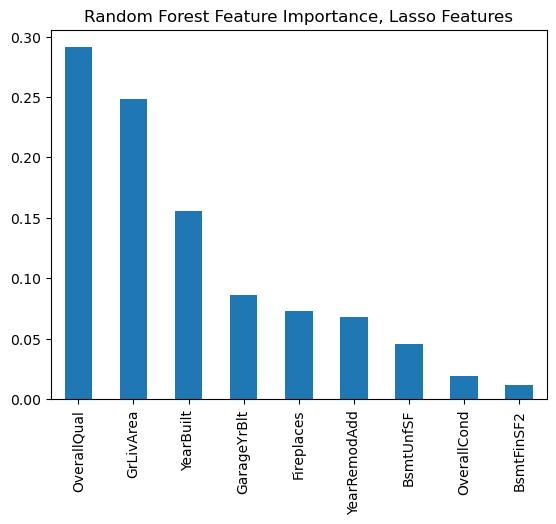

In [378]:
#Plotting Feature Importance for Lasso Features
pd.DataFrame(randomForest.feature_importances_, index = X2_train.columns).sort_values(
    by = 0, ascending = False).plot.bar(legend = False, title = 'Random Forest Feature Importance, Lasso Features')
plt.savefig('images/Forest_lass.png')

#### Random Forest with Grid Search <a href="#top">[top]</a><br>

In [379]:
#GRID SEARCH of RANDOM FOREST on Saturated test score = 90.7%

#Instanciate Random Forest
randomForest = ensemble.RandomForestRegressor(oob_score = True)

#Dict of search parameters
grid_para_forest = [{
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_leaf": range(1, 10)
    },
    {                
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
        #"random_state": [42]
    }]

#Inctanciate Grid Search
grid_search_forest = GridSearchCV(
    randomForest.set_params(random_state = 42, warm_start = True), 
    grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train.values.ravel())

#print results
print(grid_search_forest.best_params_)
print('test best score ', str(grid_search_forest.best_score_))
print('test score ', str(grid_search_forest.score(X_test, y_test)))
print('train score ', str(grid_search_forest.score(X_train, y_train)))
print(grid_search_forest.best_params_)

CPU times: user 16.5 s, sys: 4.94 s, total: 21.5 s
Wall time: 29min 10s
{'criterion': 'friedman_mse', 'min_samples_leaf': 2, 'n_estimators': 100}
test best score  0.8858869740352671
test score  0.9077751322455893
train score  0.9780413502545365


In [386]:
#GRID SEARCH of RANDOM FOREST on Lasso Features test score = 86.2%

#Instanciate Random Forest
randomForest = ensemble.RandomForestRegressor(oob_score = True)

#Dict of Parameters
grid_para_forest = [{
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_leaf": range(1, 10)
    },
    {                
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
        #"random_state": [42]
    }]

#Instanciate Grid Search
grid_search_forestl = GridSearchCV(
    randomForest.set_params(random_state = 42, warm_start = True), 
    grid_para_forest, scoring='r2', cv=5, n_jobs=-1, return_train_score = True)
%time grid_search_forestl.fit(X2_train, y2_train.values.ravel())

#Print Results
print('test best score ', str(grid_search_forestl.best_score_))
print('test score ', str(grid_search_forestl.score(X2_test, y2_test)))
print('train score ', str(grid_search_forestl.score(X2_train, y2_train)))
print('adj r2 score ', str(grid_search_forestl.score(X2_train, y2_train)))

#Calculate and print adjusted r2
r2 = grid_search_forestl.score(X2_test, y2_test)
n = X2_test.shape[0]
p = grid_search_forestl.n_features_in_
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print('adjusted r2 ', str(adjusted_r2))
print(grid_search_forestl.best_params_)

CPU times: user 5.78 s, sys: 1.02 s, total: 6.8 s
Wall time: 5min 43s
test best score  0.8367998483407441
test score  0.8627913629171235
train score  0.9167332469367969
adj r2 score  0.9167332469367969
adjusted r2  0.8603314471128489
{'criterion': 'squared_error', 'min_samples_leaf': 5, 'n_estimators': 100}


In [387]:
#GRID SEARCH of RANDOM FOREST on MLR Features test score = 90.6%

#Instanciate Random Forest
randomForest = ensemble.RandomForestRegressor(oob_score = True)

#Dict of Parameters
grid_para_forest = [{
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_leaf": range(1, 10)
    },
    {                
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
        #"random_state": [42]
    }]

#Instanciate Grid Search
grid_search_forestm = GridSearchCV(
    randomForest.set_params(random_state = 42, warm_start = True), 
    grid_para_forest, scoring='r2', cv=5, n_jobs=-1, return_train_score = True)
%time grid_search_forestm.fit(X1_train, y1_train.values.ravel())

#Print Scores
print('test best score ', str(grid_search_forestm.best_score_))
print('test score ', str(grid_search_forestm.score(X1_test, y1_test)))
print('train score ', str(grid_search_forestm.score(X1_train, y1_train)))
print(grid_search_forestm.n_features_in_)
print(grid_search_forestm.best_params_)
print(grid_search_forestm.feature_names_in_)

#Calculate and print adjusted r2
r2 = grid_search_forestm.score(X1_test, y1_test)
n = X1_test.shape[0]
p = grid_search_forestm.n_features_in_
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print('adjusted r2 ', str(adjusted_r2))
print(grid_search_forestm.best_params_)

CPU times: user 6.66 s, sys: 1.4 s, total: 8.07 s
Wall time: 8min 11s
test best score  0.8752097736456085
test score  0.9061723245255355
train score  0.9653937113862106
15
{'criterion': 'friedman_mse', 'min_samples_leaf': 2, 'n_estimators': 25}
['OverallCond' 'OverallQual' 'GarageCars' 'Fireplaces' 'FullBath'
 'BsmtFullBath' 'HalfBath' 'YearBuilt' 'YearRemodAdd' 'LotFrontage'
 'GrLivArea' 'ScreenPorch' '1stFlrSF' '3SsnPorch' 'TotalBsmtSF']
adjusted r2  0.9033347940172352
{'criterion': 'friedman_mse', 'min_samples_leaf': 2, 'n_estimators': 25}


#### Easy Features Random Forest Grid Search

In [388]:
#Establish Easy Feature Dataset Xe_train
MLR_easyfeatures = ['GarageCars','Fireplaces', 'BsmtFullBath', 'YearBuilt', 'OverallCond',
 'OverallQual','GrLivArea','Nei_quant', 'MSSubClass']
Xe = housing_l[MLR_easyfeatures]
ye = housing_y
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye, test_size=0.2, random_state=1)

In [293]:
#GRID SEARCH of RANDOM FOREST on MLR EASY Features test score = 89.9%

#Instanciate Random Forest
randomForest = ensemble.RandomForestRegressor(oob_score = True)

#Dict of Parameters
grid_para_forest = [{
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_leaf": range(1, 10)
    },
    {                
        "n_estimators": [25, 50, 100],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
        #"random_state": [42]
    }]

#Instanciate Grid Search
grid_search_foreste = GridSearchCV(
    randomForest.set_params(random_state = 42, warm_start = True), 
    grid_para_forest, scoring='r2', cv=5, n_jobs=-1, return_train_score = True)
%time grid_search_foreste.fit(Xe_train, ye_train.values.ravel())

print('test best score ', str(grid_search_foreste.best_score_))
print('test score ', str(grid_search_foreste.score(Xe_test, ye_test)))
print('train score ', str(grid_search_foreste.score(Xe_train, ye_train)))
print(grid_search_foreste.best_params_)

#Calculate and print adjusted r2
r2 = grid_search_foreste.score(Xe_test, ye_test)
n = Xe_test.shape[0]
p = grid_search_foreste.n_features_in_
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print('adjusted r2 ', str(adjusted_r2))


CPU times: user 5.7 s, sys: 1.2 s, total: 6.89 s
Wall time: 5min 27s
test best score  0.8685576431424332
test score  0.8998621751182099
train score  0.9663056761088837


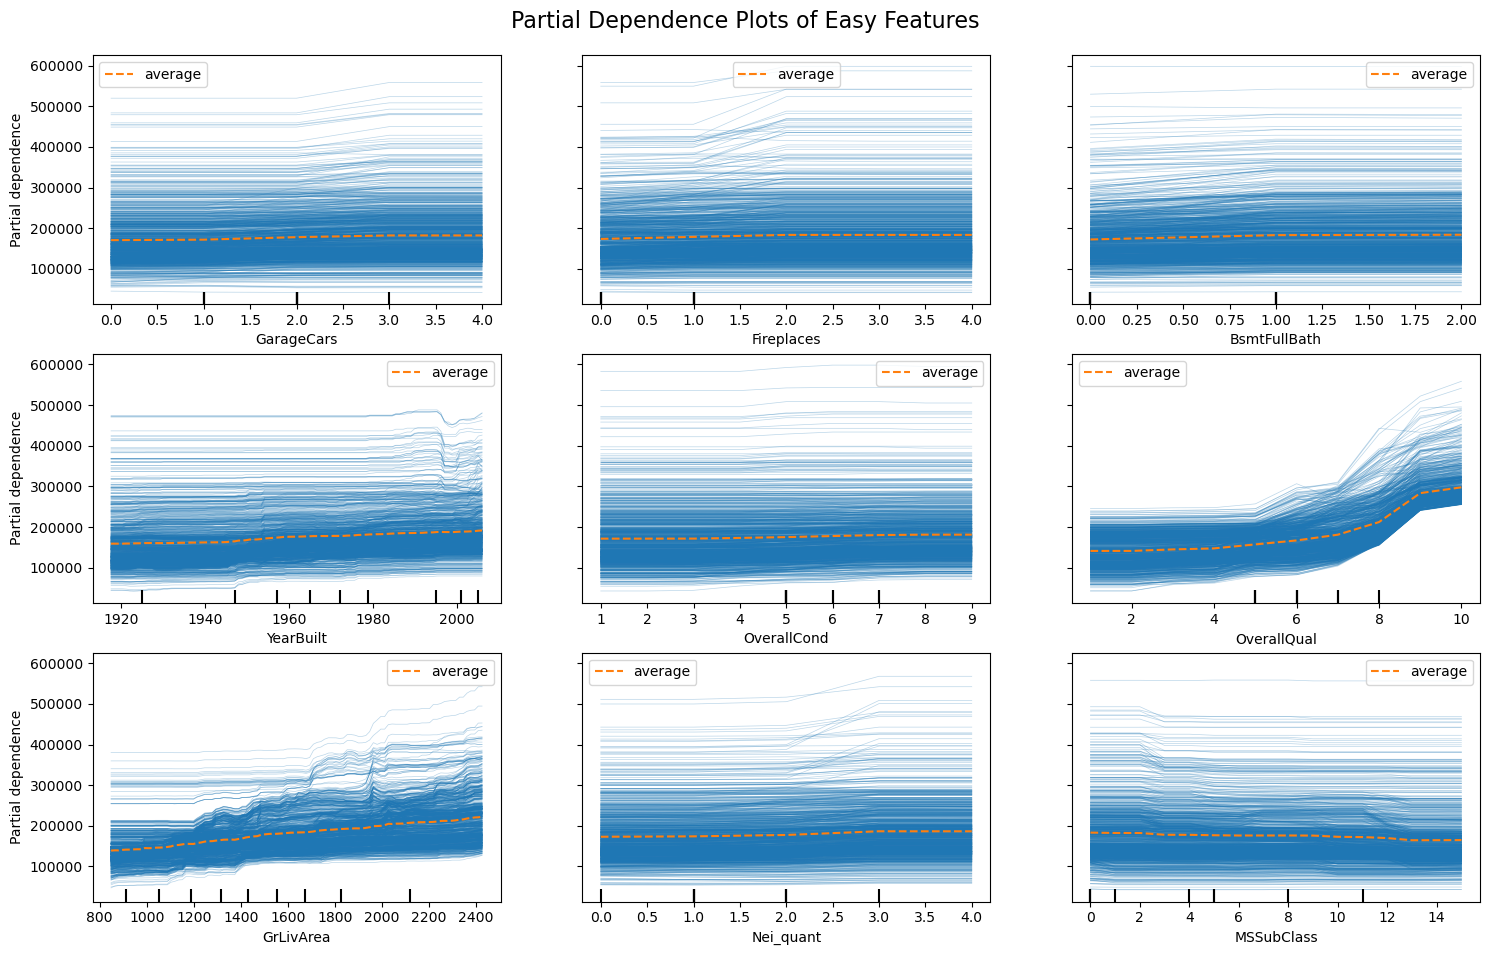

In [335]:
#ICE Partial Dependence Plot Easy Features

#List of features to plot
features = [0,1,2,3,4,5,6,7,8]

#Plot
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(grid_search_foreste.best_estimator_, Xe_train, features, ax = ax, kind = 'both')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle('Partial Dependence Plots of Easy Features', fontsize=16)
plt.savefig('images/ice_easy.png')

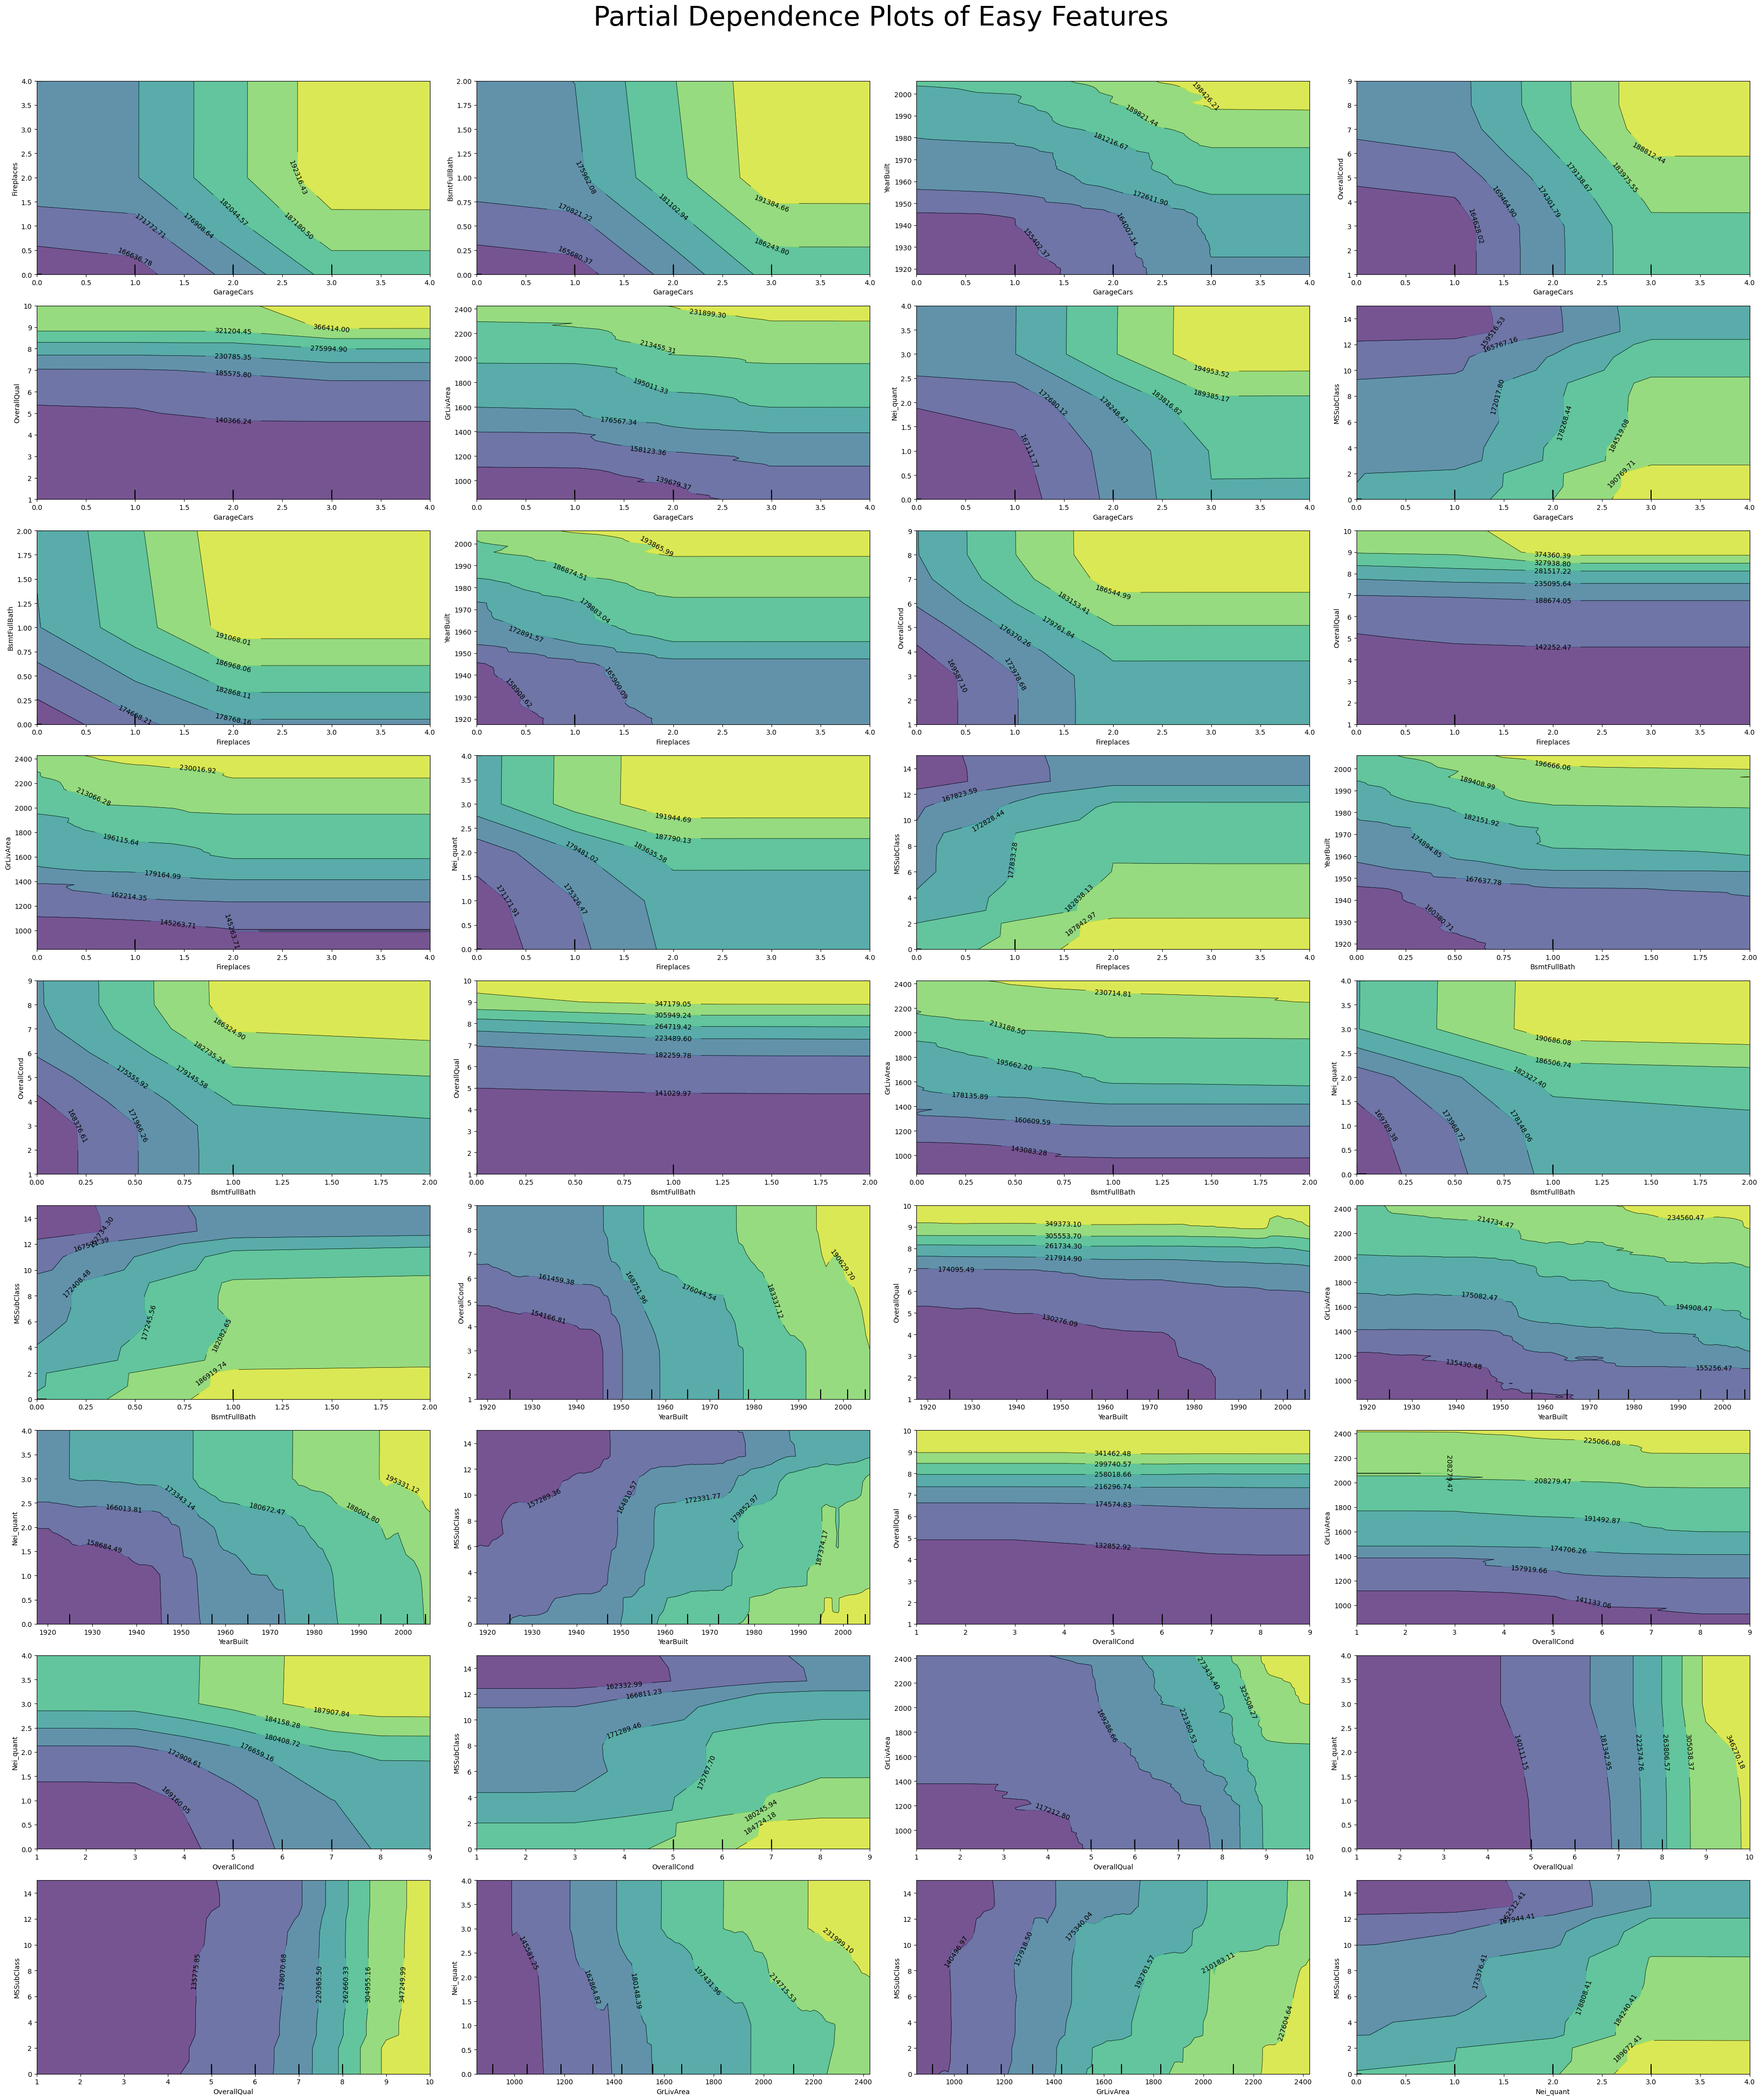

In [389]:
#Partial Dependence Plot

#List of features
features = [0,1,2,3,4,5,6,7,8]

#Combinatiosn of all features in the list - 2D
features = list(combinations(features, 2))

#Plot PDP
fig, ax = plt.subplots(9,4,figsize=(36,45
                            ))
ax = ax.flatten()
for i, pair in enumerate(features):
    PartialDependenceDisplay.from_estimator(grid_search_foreste.best_estimator_, Xe_train, [pair], ax = ax[i])
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle('Partial Dependence Plots of Easy Features', fontsize=40)
plt.savefig('images/pdp_easy.svg')

In [390]:
#Get Feaure Importance for Easy Features

sorted(zip(grid_search_foreste.best_estimator_.feature_importances_.round(3), Xe_train.columns),key=lambda t:t[0], reverse=True)

[(0.593, 'OverallQual'),
 (0.217, 'GrLivArea'),
 (0.054, 'YearBuilt'),
 (0.047, 'GarageCars'),
 (0.021, 'Fireplaces'),
 (0.021, 'MSSubClass'),
 (0.019, 'BsmtFullBath'),
 (0.018, 'Nei_quant'),
 (0.009, 'OverallCond')]

In [329]:
# Find best estimator tree in the forest
for i in range(100):
    print(str(i), str(grid_search_foreste.best_estimator_.estimators_[i].score(Xe_test, ye_test)))

/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11

0 0.8442571216981777
1 0.8474248585604025
2 0.8397605735142367
3 0.8306249487293721
4 0.8536600584221151
5 0.8397262226512434
6 0.8378940081355954
7 0.8538386416877843
8 0.8186763198134801
9 0.8144090204351898
10 0.8393776725868922
11 0.8283104029625987
12 0.8349365381568191
13 0.8597700714189334
14 0.8614110784743456
15 0.8466085994994705
16 0.79022159610789
17 0.8254814047971089
18 0.8344018331184545
19 0.8247942655938318
20 0.8219623899096655
21 0.8209633963109418
22 0.8478948757190914
23 0.7958482169911035
24 0.8474539199431337
25 0.8242123446032112
26 0.8415758718423211
27 0.8357854446401006


/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11

28 0.8489829788747096
29 0.8130802943826947
30 0.8182148447939137
31 0.8232794193782089
32 0.8221860766737963
33 0.7630487453503598
34 0.7619016925368262
35 0.8221621352078817
36 0.8139333192328018
37 0.8090414486506988
38 0.8213945641937318
39 0.8086963218935719
40 0.817853872411658
41 0.866065063824419
42 0.8203914046299949
43 0.8283757193063326
44 0.8315792153575069
45 0.799015453912924
46 0.8225047135862925
47 0.8191769037497658
48 0.8011772835553287
49 0.8440389924580473
50 0.8187403945296099
51 0.8554808656957886
52 0.8444320837398924
53 0.8287887335063515
54 0.8158160678985354
55 0.8301148634727497
56 0.8309322913506979
57 0.8325462450369256


/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11

58 0.8363701413291524
59 0.8398370319048422
60 0.8162135093633751
61 0.8249962671481759
62 0.8136792669775172
63 0.8459302262447859
64 0.844887954165059
65 0.8215495050720486
66 0.8281608144296222
67 0.8312500152166423
68 0.8171179481844784
69 0.8268941971964112
70 0.8073222925126105
71 0.8145052708588034
72 0.8483377940266421
73 0.8294473671436557
74 0.8453353609532712
75 0.8263204332497196
76 0.8230465752156629
77 0.8084270441415751
78 0.8596476895247027
79 0.8103286517605388
80 0.8206435942657297
81 0.8078980248523491
82 0.8309115615518932
83 0.8663992171359569
84 0.8572618639681876
85 0.8308163954808355
86 0.8081450371281937
87 0.8603539097900554
88 0.8045074608423018
89 0.8165950913649409
90 0.8084402880320634
91 0.8145493315756409
92 0.8160093018785857
93 0.8167713270144658
94 0.8005267634437765
95 0.8027561574854664
96 0.8203680074000943
97 0.8328291755037457
98 0.8343066452687748
99 0.8088196638594857


/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


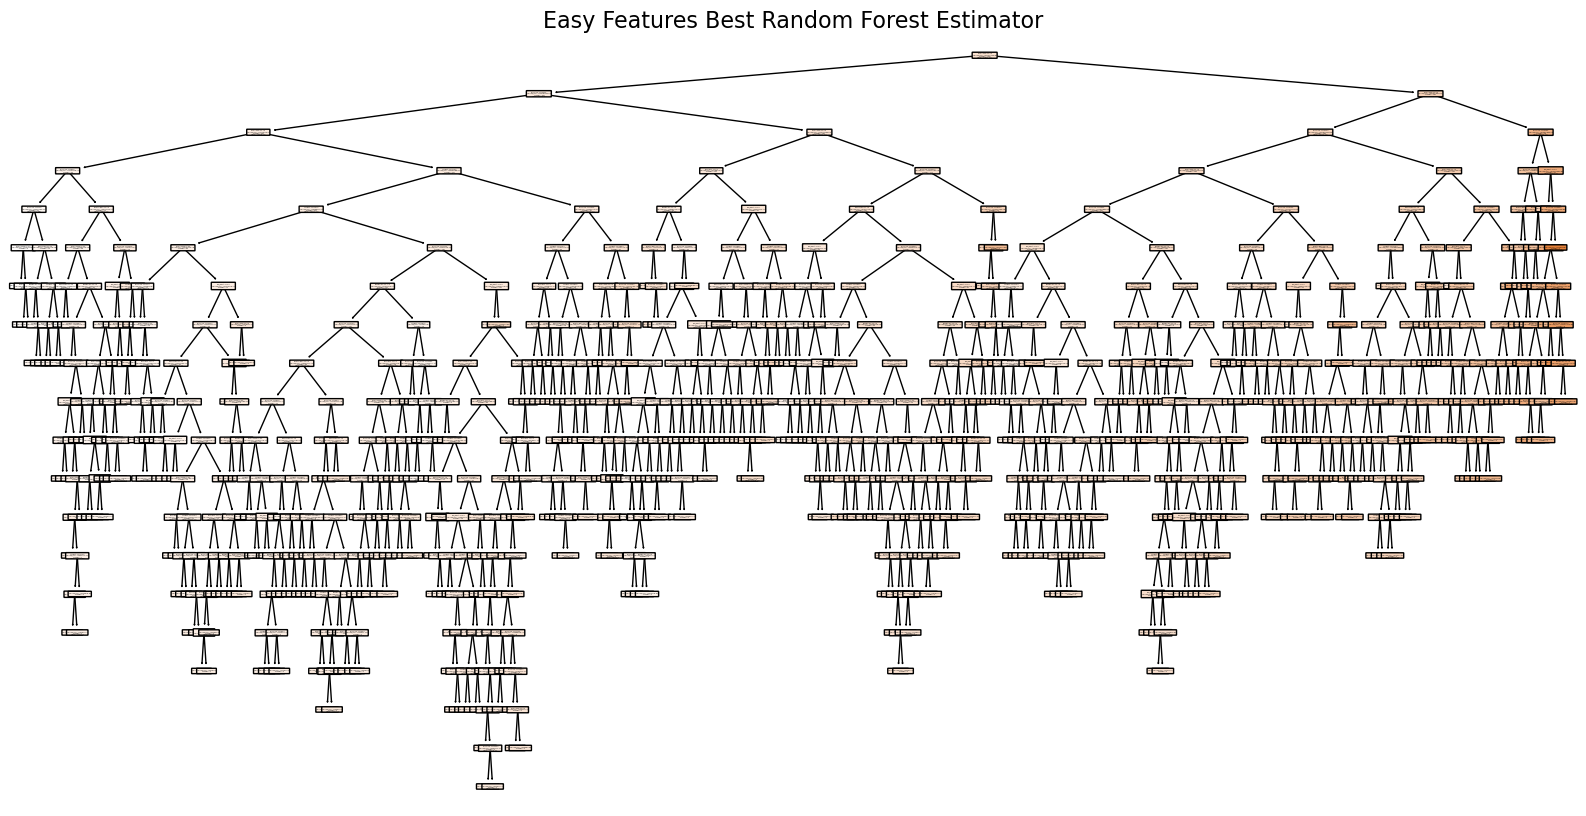

In [343]:
#Plot best estimator tree

from sklearn.tree import plot_tree
single_tree = grid_search_foreste.best_estimator_.estimators_[14]

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=Xe_train.columns, filled=True, rounded=True)

# Add a title to the plot
plt.title('Easy Features Best Random Forest Estimator', fontsize=16)

# Show the plot
plt.savefig('images/for_tree.svg')

Increased adjusted r2 by reducing the number of parameters.

<p><a name="boost"></a></p>

### Boosting <a href="#top">[top]</a><br>

Before tuning, let's set up a tuning function that visualizes the Gradeitn Boosting. 

In [392]:
#Functions to tune Boosting Regressor

#Function returns fitted Gradient Boosting Instance
def tune_gbm(learning_rate, max_depth):
    '''
    Returns fitted Gradient Boosting Instance
    learning_rate = float
    max_depth = int
    
    '''
    gbm = ensemble.GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, min_samples_split = 10, max_depth=max_depth)
    gbm.fit(data[0],data[2])
    
    return gbm

#Returns a visualisation of test and train scoring as as Boosting appraches optimal accuracy. 
#Best accuracy is defined as where test score is at a minimum. 
def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):

    '''
    Returns a visualisation of test and train scoring as as Boosting stephs go from 1 to 1000. 
    model = fitted gbm model
    start = xlim minimum value for plot. Default is 0.
    end = xlim maximimum value for plot. Default is 10000.
    '''

    #Instanciate generator
    gen_train = model.staged_predict(data[0])
    gen_test  = model.staged_predict(data[1])

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)

    #Iterate through generator and store scores in a list
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, data[2]))
        testMSE.append(mean_squared_error(y_pred_test, data[3]))
    
    #Scores
    y_pred = model.predict(data[1])
    r2 = r2_score(data[3], y_pred)
    train_r2 = r2_score(data[2], model.predict(data[0]))
    mae = np.mean(np.abs(y_pred_test - data[3]))

    #Print minimum test score and step
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print("The R squared is {:.4f}.".format(r2))
    
    n = data[1].shape[0]
    p = model.n_features_in_

    # Calculate Adjusted R^2
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    #Print Scores
    print('train r2 ', str(train_r2))
    print('adjusted r2 ', str(adjusted_r2))
    print("The MAE is {:.2f}.".format(mae))
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end], color = 'b')

    #Plot Curve
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end], color = 'r')
    plt.title('Test v Train MSE')
    plt.legend()

    #Return tuple of information
    return model.feature_importances_, model.feature_names_in_, model.n_features_in_, model.train_score_, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 411774312.58 at the step 1472
The R squared is 0.9351.
train r2  0.999999268411573
adjusted r2  0.9231077859956344
The MAE is 13350.08.
--------------------------------------------------


(array([1.53238216e-01, 1.51271967e-03, 2.64999076e-03, 3.14648822e-03,
        1.75940159e-02, 1.79372177e-12, 8.70408312e-05, 6.11285695e-04,
        1.90771533e-12, 2.61322202e-04, 2.29345427e-04, 1.65484700e-03,
        8.49196545e-04, 2.75133028e-05, 8.49397291e-05, 1.81620324e-04,
        4.91272347e-01, 7.73610543e-03, 2.41938680e-02, 7.21008789e-03,
        5.98928679e-04, 2.71873535e-04, 5.67916316e-04, 4.15769780e-04,
        1.45049805e-04, 4.41360222e-03, 2.94720947e-03, 1.10885803e-04,
        1.76288503e-04, 7.39225552e-03, 5.05241096e-05, 2.87572748e-03,
        2.55254816e-03, 3.48471483e-02, 8.89155968e-05, 8.63500424e-04,
        2.25472091e-03, 3.03272576e-02, 2.32769414e-05, 1.05236662e-03,
        1.18307020e-03, 3.91340596e-05, 2.62540680e-02, 1.78100242e-02,
        5.88688971e-05, 2.18324673e-03, 8.05655848e-05, 3.29553347e-04,
        9.48806098e-04, 2.79046176e-04, 6.61809545e-05, 9.27007536e-03,
        4.35542175e-03, 6.28527739e-04, 1.42970316e-02, 8.540927

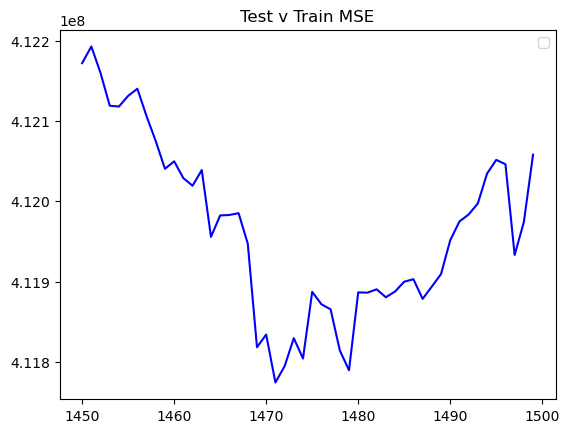

In [404]:
#Saturated Model R2 92.3%

#Moving saturate data from train split to a list, data
X2 = housing_l
y2 = housing_y['SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
data = train_test_split(X2, y2, test_size=0.2, random_state=1)
learning_rate=0.05
max_depth=4

model1 = tune_gbm(learning_rate, max_depth)

start = 1450
end = 1500 # You may change start and end to zoom in
demo_gbm_tuning(model1, start=start, end=end, training_curve=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 568719297.70 at the step 1023
The R squared is 0.8992.
train r2  0.996352167500182
adjusted r2  0.897204541589843
The MAE is 17290.62.
--------------------------------------------------


(array([0.50946973, 0.17849355, 0.0388117 , 0.05105905, 0.04393369,
        0.03724086, 0.04191863, 0.0272452 , 0.04741627, 0.02441132]),
 array(['OverallQual', 'GrLivArea', 'Nei_quant', 'BsmtFinSF1',
        'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'GarageCars', 'YearBuilt',
        '2ndFlrSF'], dtype=object),
 10,
 array([5.31899878e+09, 5.23372505e+09, 5.15029156e+09, ...,
        1.97290462e+07, 1.97250946e+07, 1.97195447e+07]))

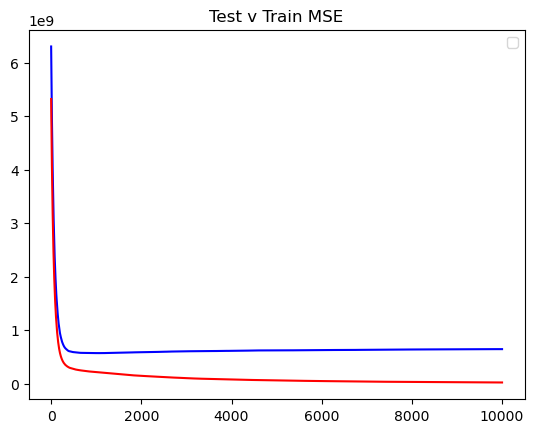

In [406]:
#Extract Top Ten features from Boosting Model and re-run from Sat Boost Model 89.7%, train 99.6%

sec_boost = []
for i in sorted(zip(model1.feature_importances_, X_train.columns),key=lambda t:t[0], reverse=True)[0:50]:
    sec_boost.append(i[1])
sec_boost

data = train_test_split(housing_l[sec_boost[0:10]], y2, test_size=0.2, random_state=1)

learning_rate=0.01
max_depth=4

model2 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model2, start, end, )  #underfitting bc we have not seen the test increase. we have not hit a minimum

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 570646724.93 at the step 9985
The R squared is 0.9106.
train r2  0.9635497363039991
adjusted r2  0.9078566164736291
The MAE is 15966.87.
--------------------------------------------------


(array([0.01225209, 0.53400785, 0.05965818, 0.02321599, 0.00056471,
        0.01342279, 0.00310082, 0.04105825, 0.01741099, 0.00995718,
        0.18382044, 0.00456728, 0.04560313, 0.00099259, 0.05036769]),
 array(['OverallCond', 'OverallQual', 'GarageCars', 'Fireplaces',
        'FullBath', 'BsmtFullBath', 'HalfBath', 'YearBuilt',
        'YearRemodAdd', 'LotFrontage', 'GrLivArea', 'ScreenPorch',
        '1stFlrSF', '3SsnPorch', 'TotalBsmtSF'], dtype=object),
 15,
 array([5.39713815e+09, 5.38846851e+09, 5.37981620e+09, ...,
        1.97062652e+08, 1.97046887e+08, 1.97043752e+08]))

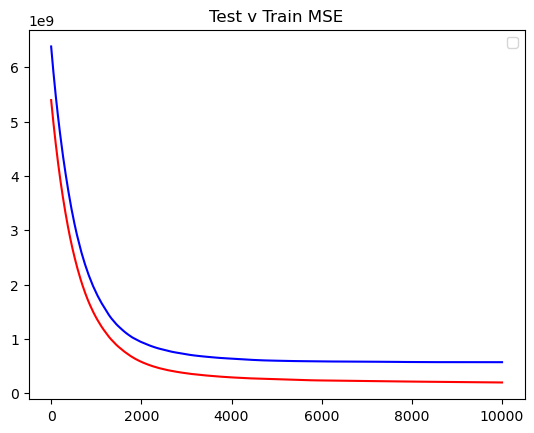

In [407]:
#MLR Features Model Adj 90.7% Train 96.3%
data = train_test_split(X1, y1['SalePrice'], test_size=0.2, random_state=1)
data[0]
learning_rate=0.001
max_depth=4

model3 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model3, start, end)  #underfitting bc we have not seen the test increase. we have not hit a minimum

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 817529937.24 at the step 9982
The R squared is 0.8718.
train r2  0.9393291121685393
adjusted r2  0.8695380984178599
The MAE is 19007.84.
--------------------------------------------------


(array([0.23418987, 0.59984557, 0.0587769 , 0.00993978, 0.02155886,
        0.00481126, 0.01652042, 0.0377135 , 0.01664382]),
 array(['GrLivArea', 'OverallQual', 'YearBuilt', 'OverallCond',
        'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'Fireplaces',
        'GarageYrBlt'], dtype=object),
 9,
 array([5.39728193e+09, 5.38875578e+09, 5.38024668e+09, ...,
        3.28006741e+08, 3.27994171e+08, 3.27976212e+08]))

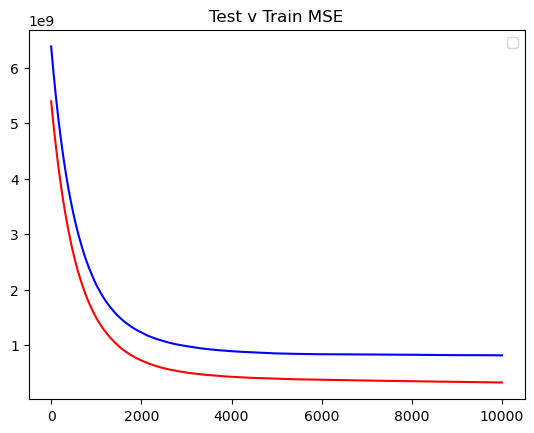

In [408]:
#Lasso Features Model Adj 86.9% Train 93.9%
data = X2_train, X2_test, y2_train.SalePrice, y2_test.SalePrice
# data[2].SalePrice
learning_rate=0.001
max_depth=4

model4 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model4, start, end)  #underfitting bc we have not seen the test increase. we have not hit a minimum

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 527062453.03 at the step 585
The R squared is 0.9034.
train r2  0.9967301170788292
adjusted r2  0.9016772972107474
The MAE is 16858.96.
--------------------------------------------------


(array([0.06952276, 0.02509105, 0.02391001, 0.06632382, 0.01270834,
        0.49354732, 0.23823802, 0.04801704, 0.02264164]),
 array(['GarageCars', 'Fireplaces', 'BsmtFullBath', 'YearBuilt',
        'OverallCond', 'OverallQual', 'GrLivArea', 'Nei_quant',
        'MSSubClass'], dtype=object),
 9,
 array([5.02037407e+09, 4.66952008e+09, 4.35251767e+09, ...,
        1.76798268e+07, 1.76780989e+07, 1.76764154e+07]))

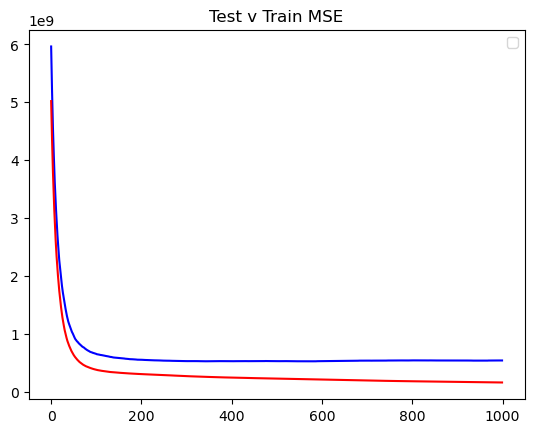

In [409]:
#EASY Features Model Adj 90.1% test 99.6%
data = Xe_train, Xe_test, ye_train.SalePrice, ye_test.SalePrice
learning_rate=0.05
max_depth=3

model5 = tune_gbm(learning_rate, max_depth)

start = 0
end = 1000 # You may change start and end to zoom in

demo_gbm_tuning(model5, start, end)  #underfitting bc we have not seen the test increase. we have not hit a minimum

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The best test score is 515666909.75 at the step 9879
The R squared is 0.9191.
train r2  0.9753389187639819
adjusted r2  0.9173369577749194
The MAE is 15200.39.
--------------------------------------------------


(array([0.06083138, 0.02405389, 0.00141387, 0.02395053, 0.05398407,
        0.01296181, 0.53918249, 0.21901927, 0.00059175, 0.04213181,
        0.02187911]),
 array(['GarageCars', 'Fireplaces', 'FullBath', 'BsmtFullBath',
        'YearBuilt', 'OverallCond', 'OverallQual', 'GrLivArea',
        'remodeled', 'Nei_quant', 'MSSubClass'], dtype=object),
 11,
 array([5.38017876e+09, 5.35468602e+09, 5.32934600e+09, ...,
        1.33323619e+08, 1.33317473e+08, 1.33313493e+08]))

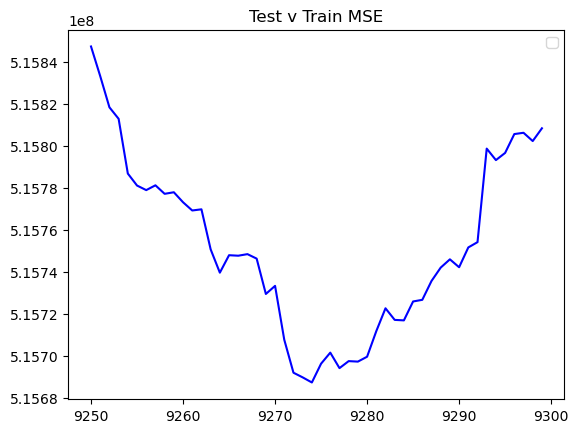

In [420]:
# V2 Model Adj 91.7% Train 97.5%

#Prep Data
MLR_features_plus = ['GarageCars','Fireplaces', 'FullBath', 'BsmtFullBath', 'YearBuilt', 'OverallCond',
 'OverallQual','GrLivArea','remodeled','Nei_quant', 'MSSubClass']
Xp = housing_l[MLR_features_plus]
yp = housing_y
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.2, random_state=1)
data = Xp_train, Xp_test, yp_train.SalePrice, yp_test.SalePrice

#Params
learning_rate=0.003
max_depth=4

model6 = tune_gbm(learning_rate, max_depth)

start = 9250
end = 9300 # You may change start and end to zoom in

demo_gbm_tuning(model6, start, end, training_curve = False)  #underfitting bc we have not seen the test increase. we have not hit a minimum
